# Visualizing Convolution
#### by Elizabeth Barnes

The concept of convolution is an important one and found in many applications. A basic example of convolution is taking a running-mean. The act of computing this running mean is _convolving_ a rectangular window with your data.

Having a finite window of data (i.e. a finite amount of data - alas, something most of us must deal with!) is like applying a boxcar window in "time-space". As we discussed in class, this translates to convoling the _response function of a boxcar with the power spectrum of your data_ in frequency space. Let's look at what this does.

_The code directly below disables autoscrolling in this notebook so that you can see all of the figures at the same time._

In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

#.............................................
# IMPORT STATEMENTS
#.............................................
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig
import scipy.stats as stats

#.............................................
# PLOTTING COMMANDS
#.............................................
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 100
MS = 10

define a useful function

In [2]:
def isclosest(X, val):
    j = np.argmin(np.abs(np.asarray(X)-val))
    if(np.size(j) == 0):
        return False, np.nan
    else:
        return True, j   

### Get some data together to play with

In this section I am just trying to make a power spectrum that is interesting. Don't worry about what is actually being done - all that matters is that in the end we get an interesting looking power spectrum 

In [3]:
T = 256         #length of window
N = 1          #number of realizations
alpha = 0.5     #red noise lag-one autocorrelation

T2 = T/2
freq = np.arange(0.,T2+1.)/T

In [4]:
# contstruct a rednoise spectrum
# see also python notebook testing_spectral_significance.ipynb
factor = np.sqrt(1.-alpha*alpha)
x = np.zeros(T,)
x[0] = x[-1]*alpha + factor*np.random.randn()
for j in np.arange(1,T,1):
    x[j] = x[j-1]*alpha + factor*np.random.randn()+0.5*np.cos(2.*np.pi*(1.-0.01*np.random.randn())*50./256.*j)

Data_Spec = sig.welch(x,window='hanning', nperseg=T)[1]
#normalize the spectrum
Data_Spec = Data_Spec/np.mean(Data_Spec)

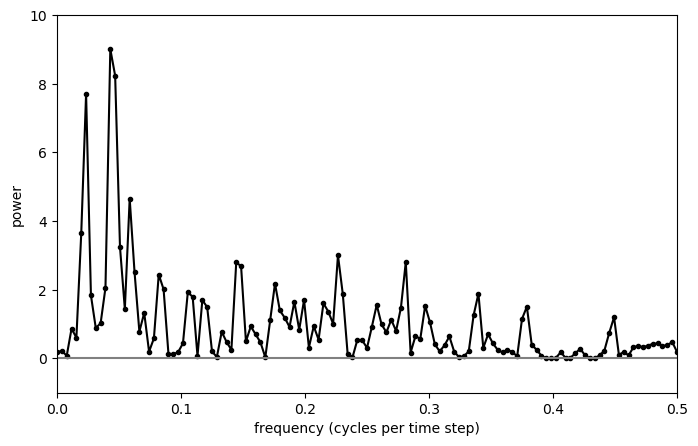

In [5]:
# plot example spectrum "Data_Spec"
plt.figure(figsize=(8,5))
plt.plot(freq,Data_Spec, '.-k', linewidth = 1.5, markersize = 6, label = 'data spectrum')
plt.xlabel('frequency (cycles per time step)')
plt.ylabel('power')
plt.xlim(0,.5)
plt.ylim(-1., 10.)
plt.axhline(y=0,color='gray');

### Calculating the Convolution

Now, suppose that our spectrum "Data_Spec" shown above is some _true/_ spectrum (of an infinitely long time series). 

In [6]:
# now assume you only have 30 timesteps of data instead of an infinite number
T = 30

omega = np.append([-1.*freq*2.*np.pi],[freq*2.*np.pi])
omega = np.sort(omega)
omega = omega[int(np.size(omega)/4):int(3*np.size(omega)/4):1]

# use sinc function to create the function we need to convolve our spectrum with
B = np.sinc(omega*T/(2.*np.pi))

# calculate the convolution of our spectrum "Data_Spec" and the sinc function "B"
Cb = np.convolve(Data_Spec,B/np.sum(B), mode = 'same')

### Visualizing the Convolution

Let's choose an example frequency in our spectrum and look at what happens with convolution with the Fourier Transform of a rectangular box (sinc function; see below). We see that the convolution is in essence a weighted-average around that point, with our sinc function centered on that frequency.

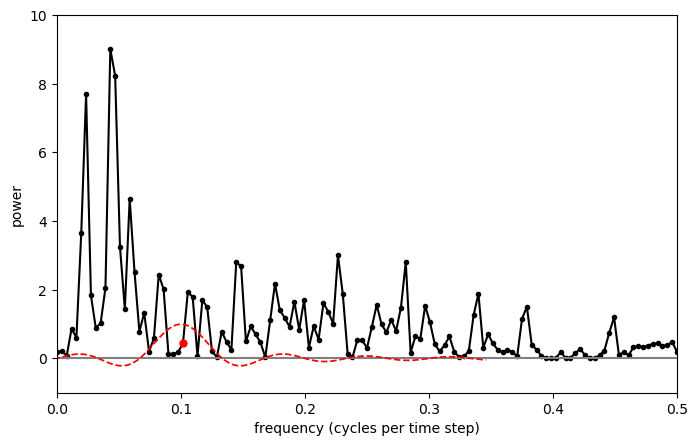

In [7]:
plt.figure(figsize=(8,5))
plt.plot(freq,Data_Spec, '.-k', linewidth = 1.5, markersize = 6, label = 'data spectrum')
plt.xlabel('frequency (cycles per time step)')
plt.ylabel('power')
plt.xlim(0,.5)
plt.ylim(-1., 10.)
plt.axhline(y=0,color='gray')

plt.plot(omega/(2.*np.pi)+.1, B/np.max(B), '--r', linewidth = 1.25, label = 'response function of rectangular window')
j = isclosest(freq,.1)[1]
plt.plot(freq[j],Data_Spec[j],'.r',markersize = MS)
plt.show()

Moving to a different example frequency, we see once again that the convolution is a weighted-average around this new point, with our sinc function once againe centered on that frequency.

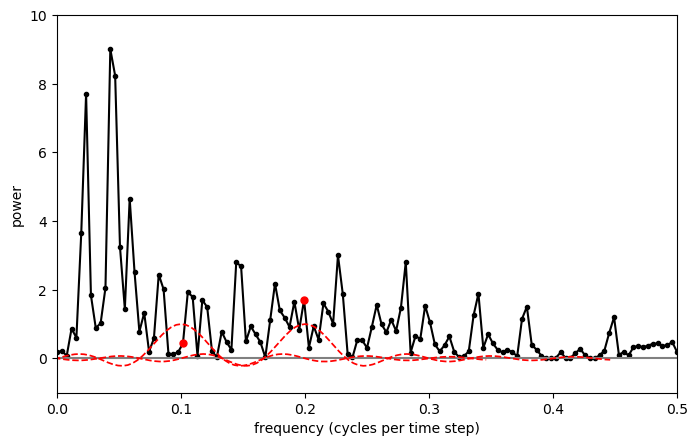

In [8]:
plt.figure(figsize=(8,5))
plt.plot(freq,Data_Spec, '.-k', linewidth = 1.5, markersize = 6, label = 'data spectrum')
plt.xlabel('frequency (cycles per time step)')
plt.ylabel('power')
plt.xlim(0,.5)
plt.ylim(-1., 10.)
plt.axhline(y=0,color='gray')

plt.plot(omega/(2.*np.pi)+.1, B/np.max(B), '--r', linewidth = 1.25, label = 'response function of rectangular window')
j = isclosest(freq,.1)[1]
plt.plot(freq[j],Data_Spec[j],'.r',markersize = MS)

plt.plot(omega/(2.*np.pi)+.2, B/np.max(B), '--r', linewidth = 1.25)
j = isclosest(freq,.2)[1]
plt.plot(freq[j],Data_Spec[j],'.r',markersize = MS)
plt.show()

Doing it one more time as an example...

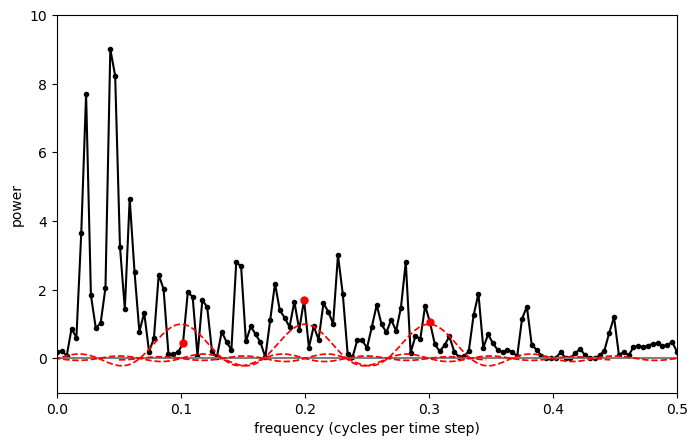

In [9]:
plt.figure(figsize=(8,5))
plt.plot(freq,Data_Spec, '.-k', linewidth = 1.5, markersize = 6, label = 'data spectrum')
plt.xlabel('frequency (cycles per time step)')
plt.ylabel('power')
plt.xlim(0,.5)
plt.ylim(-1., 10.)
plt.axhline(y=0,color='gray')

plt.plot(omega/(2.*np.pi)+.1, B/np.max(B), '--r', linewidth = 1.25, label = 'response function of rectangular window')
j = isclosest(freq,.1)[1]
plt.plot(freq[j],Data_Spec[j],'.r',markersize = MS)

plt.plot(omega/(2.*np.pi)+.2, B/np.max(B), '--r', linewidth = 1.25)
j = isclosest(freq,.2)[1]
plt.plot(freq[j],Data_Spec[j],'.r',markersize = MS)

plt.plot(omega/(2.*np.pi)+.3, B/np.max(B), '--r', linewidth = 1.25)
j = isclosest(freq,.3)[1]
plt.plot(freq[j],Data_Spec[j],'.r',markersize = MS)

plt.show()

Putting this all together, and convolving the sinc function with our entire spectrum function, leads to the following _smoothed_ power spectrum of our data. Now, this is NOT smoothing that you wanted to happen! This is smoothing that was done purely because you only had a finite amount of data and thus, without intending to, were applying a boxcar to the "true" infinite data series.

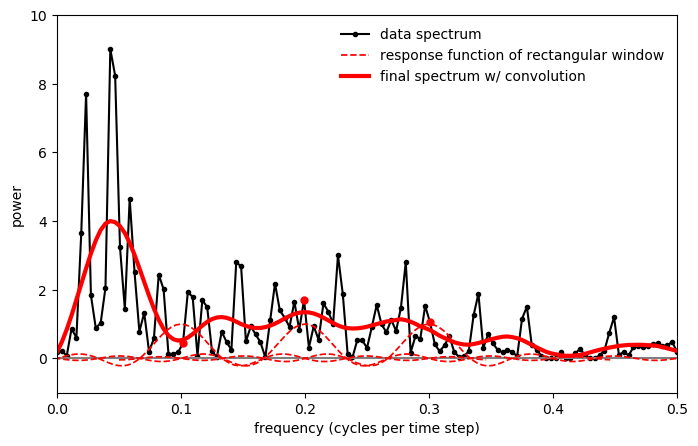

In [10]:
plt.figure(figsize=(8,5))
plt.plot(freq,Data_Spec, '.-k', linewidth = 1.5, markersize = 6, label = 'data spectrum')
plt.xlabel('frequency (cycles per time step)')
plt.ylabel('power')
plt.xlim(0,.5)
plt.ylim(-1., 10.)
plt.axhline(y=0,color='gray')

plt.plot(omega/(2.*np.pi)+.1, B/np.max(B), '--r', linewidth = 1.25, label = 'response function of rectangular window')
j = isclosest(freq,.1)[1]
plt.plot(freq[j],Data_Spec[j],'.r',markersize = MS)

plt.plot(omega/(2.*np.pi)+.2, B/np.max(B), '--r', linewidth = 1.25)
j = isclosest(freq,.2)[1]
plt.plot(freq[j],Data_Spec[j],'.r',markersize = MS)

plt.plot(omega/(2.*np.pi)+.3, B/np.max(B), '--r', linewidth = 1.25)
j = isclosest(freq,.3)[1]
plt.plot(freq[j],Data_Spec[j],'.r',markersize = MS)

plt.plot(freq,Cb,'-r',linewidth = 3, label = 'final spectrum w/ convolution')
plt.legend(frameon = False)

plt.show()

*To see any updated versions of this notebook, visit https://github.com/eabarnes1010/ats655-coursematerial/blob/master/jupyter_notebooks/convolution_example.ipynb*